In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('/content/news headlines.csv')

In [6]:
df.head()

,Date,News,Label
0,01-07-2016,A 117-year-old woman in Mexico City finally re...,0.0
1,01-07-2016,IMF chief backs Athens as permanent Olympic host,1.0
2,01-07-2016,"The president of France says if Brexit won, so...",0.0
3,01-07-2016,British Man Who Must Give Police 24 Hours' Not...,0.0
4,01-07-2016,100+ Nobel laureates urge Greenpeace to stop o...,1.0


In [7]:
df["Label"].value_counts()

,count
Label,
0.0,1614
1.0,1386


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    73608 non-null  object 
 1   News    73608 non-null  object 
 2   Label   3000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [9]:
df.tail()

,Date,News,Label
73603,08-06-2008,b'Man goes berzerk in Akihabara and stabs ever...,NaN
73604,08-06-2008,b'Threat of world AIDS pandemic among heterose...,NaN
73605,08-06-2008,b'Angst in Ankara: Turkey Steers into a Danger...,NaN
73606,08-06-2008,"b""UK: Identity cards 'could be used to spy on ...",NaN
73607,08-06-2008,"b'Marriage, they said, was reduced to the stat...",NaN


In [10]:
df.drop(columns=['Date'], inplace=True)


In [11]:
df.head()

,News,Label
0,A 117-year-old woman in Mexico City finally re...,0.0
1,IMF chief backs Athens as permanent Olympic host,1.0
2,"The president of France says if Brexit won, so...",0.0
3,British Man Who Must Give Police 24 Hours' Not...,0.0
4,100+ Nobel laureates urge Greenpeace to stop o...,1.0


In [12]:
#a new data frame with 3000 rows from df

ka=df.iloc[:3000].copy()

In [13]:
ka.tail()

,News,Label
2995,"Spain Seizes 20,000 Military Uniforms Bound fo...",0.0
2996,Gulf nations declare Hezbollah a terrorist group,0.0
2997,'Huge drop' in civilian deaths after Syria tru...,1.0
2998,Kremlin: Russia concerned by North Korea's rea...,0.0
2999,Singapore Owner Recounts How Singapore Classif...,0.0


In [14]:
ka.head()

,News,Label
0,A 117-year-old woman in Mexico City finally re...,0.0
1,IMF chief backs Athens as permanent Olympic host,1.0
2,"The president of France says if Brexit won, so...",0.0
3,British Man Who Must Give Police 24 Hours' Not...,0.0
4,100+ Nobel laureates urge Greenpeace to stop o...,1.0


In [15]:
ka.count()

,0
News,3000
Label,3000


In [16]:
ka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   News    3000 non-null   object 
 1   Label   3000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.0+ KB


In [17]:
# Assuming your DataFrame is called 'df'

ka['Label'] = ka['Label'].astype(int)

In [18]:
ka.head()

,News,Label
0,A 117-year-old woman in Mexico City finally re...,0
1,IMF chief backs Athens as permanent Olympic host,1
2,"The president of France says if Brexit won, so...",0
3,British Man Who Must Give Police 24 Hours' Not...,0
4,100+ Nobel laureates urge Greenpeace to stop o...,1


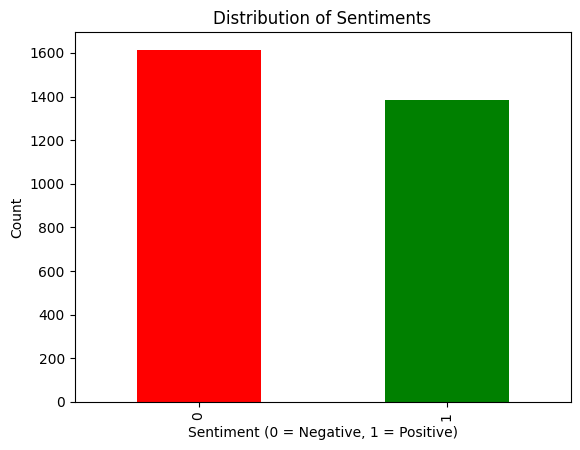

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame named df
ka['Label'].value_counts().plot(kind='bar', color=['red', 'green'], title='Distribution of Sentiments')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

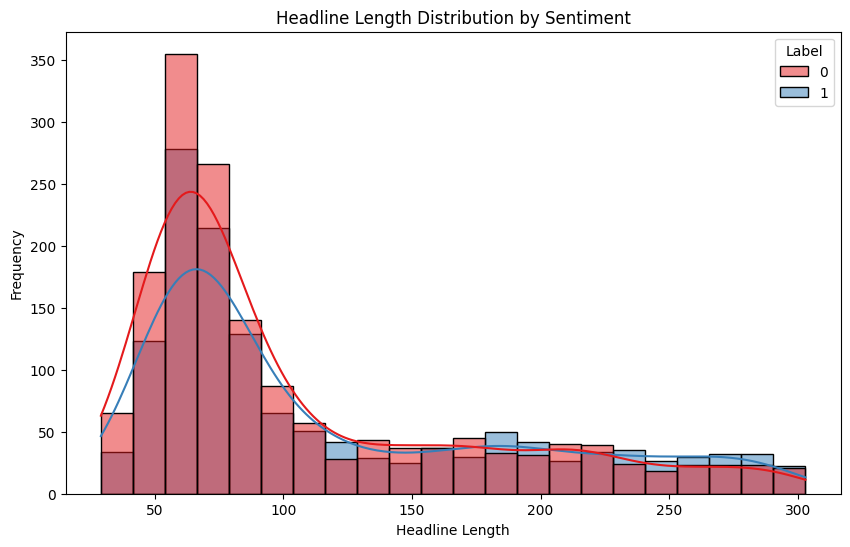

In [20]:
ka['News_length'] = ka['News'].apply(len)

# Visualize headline lengths grouped by sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=ka, x='News_length', hue='Label', kde=True,palette='Set1')
plt.title('Headline Length Distribution by Sentiment')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

In [21]:
ka.head()

,News,Label,News_length
0,A 117-year-old woman in Mexico City finally re...,0,184
1,IMF chief backs Athens as permanent Olympic host,1,48
2,"The president of France says if Brexit won, so...",0,63
3,British Man Who Must Give Police 24 Hours' Not...,0,175
4,100+ Nobel laureates urge Greenpeace to stop o...,1,58


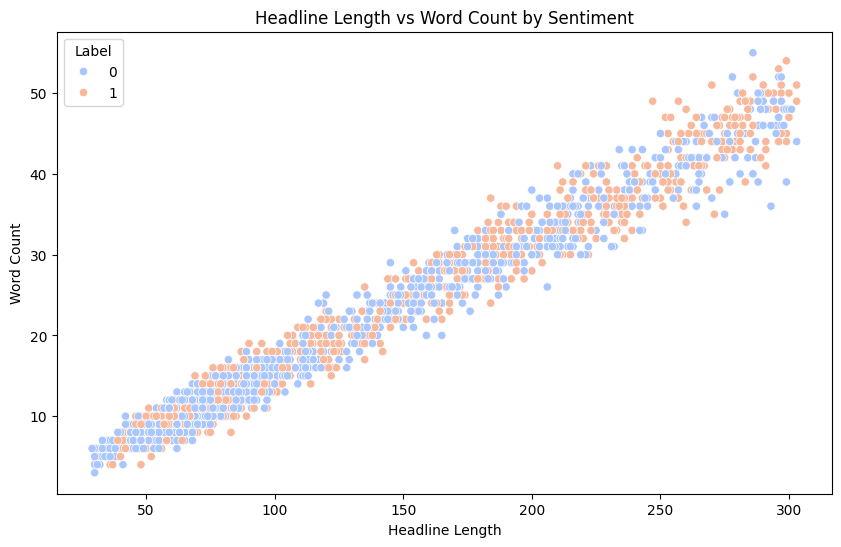

In [22]:
# Add a word count column to 'ka'
ka['word_count'] = ka['News'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='News_length', y='word_count', hue='Label', data=ka, palette='coolwarm')
plt.title('Headline Length vs Word Count by Sentiment')
plt.xlabel('Headline Length')
plt.ylabel('Word Count')
plt.show()

# **Applying Word Cloud**

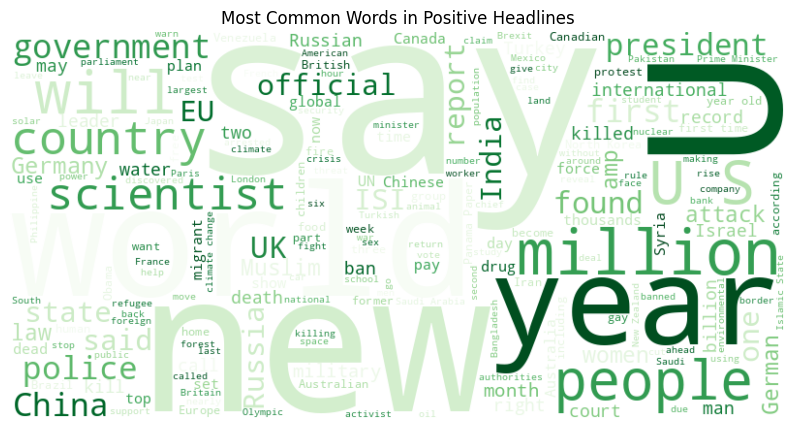

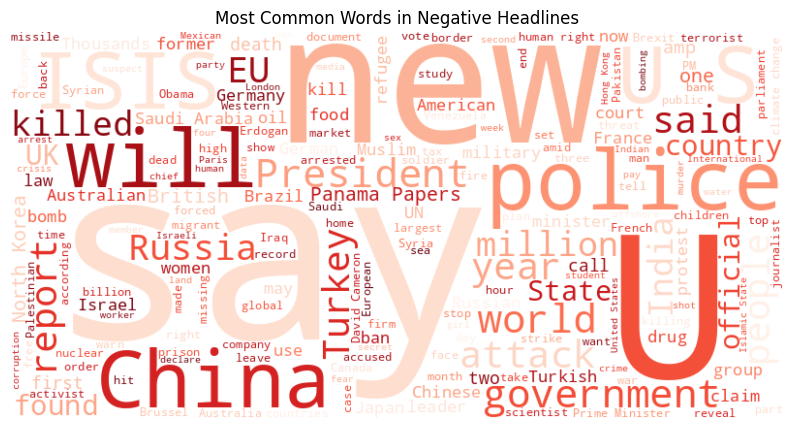

In [23]:
from collections import Counter
from wordcloud import WordCloud

# Function to generate a word cloud
def generate_wordcloud(data, sentiment, color):
    text = ' '.join(data[data['Label'] == sentiment]['News'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {"Positive" if sentiment == 1 else "Negative"} Headlines')
    plt.show()

# Generate word clouds for both sentiments
generate_wordcloud(df, 1, 'Greens')  # Positive headlines
generate_wordcloud(df, 0, 'Reds')   # Negative headlines


In [24]:
ka.head()

,News,Label,News_length,word_count
0,A 117-year-old woman in Mexico City finally re...,0,184,32
1,IMF chief backs Athens as permanent Olympic host,1,48,8
2,"The president of France says if Brexit won, so...",0,63,12
3,British Man Who Must Give Police 24 Hours' Not...,0,175,32
4,100+ Nobel laureates urge Greenpeace to stop o...,1,58,9


# Removing Unnecessary Symbols and Characters

In [25]:
import re

def clean_text(text):
    """Cleans the text data by removing unnecessary characters and standardizing it."""
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    #remove numbers
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # Remove leading and trailing spaces
    return text.lower() # Convert to lowercase

# Apply the cleaning function to the 'News' column
ka['cleaned_news'] = ka['News'].apply(clean_text)

# Display the results
ka.head()

,News,Label,News_length,word_count,cleaned_news
0,A 117-year-old woman in Mexico City finally re...,0,184,32,a yearold woman in mexico city finally receive...
1,IMF chief backs Athens as permanent Olympic host,1,48,8,imf chief backs athens as permanent olympic host
2,"The president of France says if Brexit won, so...",0,63,12,the president of france says if brexit won so ...
3,British Man Who Must Give Police 24 Hours' Not...,0,175,32,british man who must give police hours notice...
4,100+ Nobel laureates urge Greenpeace to stop o...,1,58,9,nobel laureates urge greenpeace to stop opposi...


# Performing Tokenisation

In [26]:
#perform tokenisation on news column
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [27]:
#tokenisation process for news column
ka['tokenized_news'] = ka['cleaned_news'].apply(word_tokenize)
ka.head()

,News,Label,News_length,word_count,cleaned_news,tokenized_news
0,A 117-year-old woman in Mexico City finally re...,0,184,32,a yearold woman in mexico city finally receive...,"[a, yearold, woman, in, mexico, city, finally,..."
1,IMF chief backs Athens as permanent Olympic host,1,48,8,imf chief backs athens as permanent olympic host,"[imf, chief, backs, athens, as, permanent, oly..."
2,"The president of France says if Brexit won, so...",0,63,12,the president of france says if brexit won so ...,"[the, president, of, france, says, if, brexit,..."
3,British Man Who Must Give Police 24 Hours' Not...,0,175,32,british man who must give police hours notice...,"[british, man, who, must, give, police, hours,..."
4,100+ Nobel laureates urge Greenpeace to stop o...,1,58,9,nobel laureates urge greenpeace to stop opposi...,"[nobel, laureates, urge, greenpeace, to, stop,..."


# Applying Lemmatization

In [28]:
#apply lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [29]:
#lemmatization
ka['lemmatized_news'] = ka['tokenized_news'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
ka.head()

,News,Label,News_length,word_count,cleaned_news,tokenized_news,lemmatized_news
0,A 117-year-old woman in Mexico City finally re...,0,184,32,a yearold woman in mexico city finally receive...,"[a, yearold, woman, in, mexico, city, finally,...","[a, yearold, woman, in, mexico, city, finally,..."
1,IMF chief backs Athens as permanent Olympic host,1,48,8,imf chief backs athens as permanent olympic host,"[imf, chief, backs, athens, as, permanent, oly...","[imf, chief, back, athens, a, permanent, olymp..."
2,"The president of France says if Brexit won, so...",0,63,12,the president of france says if brexit won so ...,"[the, president, of, france, says, if, brexit,...","[the, president, of, france, say, if, brexit, ..."
3,British Man Who Must Give Police 24 Hours' Not...,0,175,32,british man who must give police hours notice...,"[british, man, who, must, give, police, hours,...","[british, man, who, must, give, police, hour, ..."
4,100+ Nobel laureates urge Greenpeace to stop o...,1,58,9,nobel laureates urge greenpeace to stop opposi...,"[nobel, laureates, urge, greenpeace, to, stop,...","[nobel, laureate, urge, greenpeace, to, stop, ..."


# Applying Stopwords

In [30]:
#stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
#stopwords
ka['filtered_news'] = ka['lemmatized_news'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
ka.head()

,News,Label,News_length,word_count,cleaned_news,tokenized_news,lemmatized_news,filtered_news
0,A 117-year-old woman in Mexico City finally re...,0,184,32,a yearold woman in mexico city finally receive...,"[a, yearold, woman, in, mexico, city, finally,...","[a, yearold, woman, in, mexico, city, finally,...","[yearold, woman, mexico, city, finally, receiv..."
1,IMF chief backs Athens as permanent Olympic host,1,48,8,imf chief backs athens as permanent olympic host,"[imf, chief, backs, athens, as, permanent, oly...","[imf, chief, back, athens, a, permanent, olymp...","[imf, chief, back, athens, permanent, olympic,..."
2,"The president of France says if Brexit won, so...",0,63,12,the president of france says if brexit won so ...,"[the, president, of, france, says, if, brexit,...","[the, president, of, france, say, if, brexit, ...","[president, france, say, brexit, donald, trump]"
3,British Man Who Must Give Police 24 Hours' Not...,0,175,32,british man who must give police hours notice...,"[british, man, who, must, give, police, hours,...","[british, man, who, must, give, police, hour, ...","[british, man, must, give, police, hour, notic..."
4,100+ Nobel laureates urge Greenpeace to stop o...,1,58,9,nobel laureates urge greenpeace to stop opposi...,"[nobel, laureates, urge, greenpeace, to, stop,...","[nobel, laureate, urge, greenpeace, to, stop, ...","[nobel, laureate, urge, greenpeace, stop, oppo..."


# Performing Vectorization using FastText

In [32]:
#perform fasttext vectorization
from gensim.models import FastText
model = FastText(sentences=ka['lemmatized_news'], vector_size=300, window=5, min_count=5, sg =1)


In [33]:
ka

,News,Label,News_length,word_count,cleaned_news,tokenized_news,lemmatized_news,filtered_news
0,A 117-year-old woman in Mexico City finally re...,0,184,32,a yearold woman in mexico city finally receive...,"[a, yearold, woman, in, mexico, city, finally,...","[a, yearold, woman, in, mexico, city, finally,...","[yearold, woman, mexico, city, finally, receiv..."
1,IMF chief backs Athens as permanent Olympic host,1,48,8,imf chief backs athens as permanent olympic host,"[imf, chief, backs, athens, as, permanent, oly...","[imf, chief, back, athens, a, permanent, olymp...","[imf, chief, back, athens, permanent, olympic,..."
2,"The president of France says if Brexit won, so...",0,63,12,the president of france says if brexit won so ...,"[the, president, of, france, says, if, brexit,...","[the, president, of, france, say, if, brexit, ...","[president, france, say, brexit, donald, trump]"
3,British Man Who Must Give Police 24 Hours' Not...,0,175,32,british man who must give police hours notice...,"[british, man, who, must, give, police, hours,...","[british, man, who, must, give, police, hour, ...","[british, man, must, give, police, hour, notic..."
4,100+ Nobel laureates urge Greenpeace to stop o...,1,58,9,nobel laureates urge greenpeace to stop opposi...,"[nobel, laureates, urge, greenpeace, to, stop,...","[nobel, laureate, urge, greenpeace, to, stop, ...","[nobel, laureate, urge, greenpeace, stop, oppo..."
...,...,...,...,...,...,...,...,...
2995,"Spain Seizes 20,000 Military Uniforms Bound fo...",0,52,8,spain seizes military uniforms bound for isis,"[spain, seizes, military, uniforms, bound, for...","[spain, seizes, military, uniform, bound, for,...","[spain, seizes, military, uniform, bound, isi]"
2996,Gulf nations declare Hezbollah a terrorist group,0,48,7,gulf nations declare hezbollah a terrorist group,"[gulf, nations, declare, hezbollah, a, terrori...","[gulf, nation, declare, hezbollah, a, terroris...","[gulf, nation, declare, hezbollah, terrorist, ..."
2997,'Huge drop' in civilian deaths after Syria tru...,1,57,9,huge drop in civilian deaths after syria truce...,"[huge, drop, in, civilian, deaths, after, syri...","[huge, drop, in, civilian, death, after, syria...","[huge, drop, civilian, death, syria, truce, mo..."
2998,Kremlin: Russia concerned by North Korea's rea...,0,72,11,kremlin russia concerned by north koreas readi...,"[kremlin, russia, concerned, by, north, koreas...","[kremlin, russia, concerned, by, north, korea,...","[kremlin, russia, concerned, north, korea, rea..."


In [34]:
model.wv['election']

array([-7.03296671e-03, -3.44853066e-02, -1.06181376e-01,  4.05751131e-02,
        6.03195690e-02, -2.04627395e-01, -9.20305699e-02,  1.08683594e-01,
        1.01805225e-01,  4.24604863e-02, -1.90291539e-01, -5.13038896e-02,
       -1.06969424e-01, -2.05903631e-02, -2.42211465e-02,  9.88907441e-02,
        1.31014571e-01, -1.17495775e-01,  8.87933746e-02,  4.08745790e-03,
       -1.98896408e-01,  1.32836446e-01, -4.11061794e-02, -6.76409379e-02,
        2.00075731e-01,  1.75309956e-01, -7.48081282e-02, -3.50298658e-02,
       -1.09350450e-01, -2.60044515e-01,  5.58426864e-02,  6.57124519e-02,
       -7.55721927e-02,  6.03104420e-02, -2.03407705e-01,  3.99890309e-03,
       -1.28034517e-04, -5.11956438e-02,  7.95225054e-02, -3.95275503e-02,
       -7.38718510e-02,  9.58282351e-02,  9.90462378e-02, -2.04579487e-01,
        8.76312796e-03,  8.17786623e-03, -1.48737729e-01,  2.54230946e-01,
        7.63568059e-02,  1.66240990e-01,  2.22542301e-01,  6.69169351e-02,
       -1.01637326e-01, -

# Finding similar words

In [35]:
model.wv.most_similar('killed')

[('killing', 0.9997592568397522),
 ('kill', 0.9996838569641113),
 ('found', 0.9996060729026794),
 ('killer', 0.9995562434196472),
 ('last', 0.9994413256645203),
 ('year', 0.9994240403175354),
 ('people', 0.999394953250885),
 ('east', 0.9993892908096313),
 ('first', 0.9993756413459778),
 ('worst', 0.9993640184402466)]

In [36]:
model

# Computing Avg Word Vectors

In [37]:
import numpy as np

def compute_average_word_vector(documents, model):
  average_vectors = []
  for document in documents:
    word_vectors = [model.wv[word] for word in document if word in model.wv]
    if word_vectors:
      avg_vec = np.mean(word_vectors, axis=0)
    else:
      avg_vec = np.zeros(model.vector_size)  # Assign zeros if no word vectors are found
    average_vectors.append(avg_vec) #Append the avg_vec in all cases, not just the else block
  return np.array(average_vectors)

ka['avg_word_vector'] = list(compute_average_word_vector(ka['lemmatized_news'], model))

In [38]:
ka

,News,Label,News_length,word_count,cleaned_news,tokenized_news,lemmatized_news,filtered_news,avg_word_vector
0,A 117-year-old woman in Mexico City finally re...,0,184,32,a yearold woman in mexico city finally receive...,"[a, yearold, woman, in, mexico, city, finally,...","[a, yearold, woman, in, mexico, city, finally,...","[yearold, woman, mexico, city, finally, receiv...","[-0.0056232507, -0.029225308, -0.08637707, 0.0..."
1,IMF chief backs Athens as permanent Olympic host,1,48,8,imf chief backs athens as permanent olympic host,"[imf, chief, backs, athens, as, permanent, oly...","[imf, chief, back, athens, a, permanent, olymp...","[imf, chief, back, athens, permanent, olympic,...","[-0.0055382554, -0.02695003, -0.08390096, 0.03..."
2,"The president of France says if Brexit won, so...",0,63,12,the president of france says if brexit won so ...,"[the, president, of, france, says, if, brexit,...","[the, president, of, france, say, if, brexit, ...","[president, france, say, brexit, donald, trump]","[-0.0063978317, -0.030998193, -0.09693363, 0.0..."
3,British Man Who Must Give Police 24 Hours' Not...,0,175,32,british man who must give police hours notice...,"[british, man, who, must, give, police, hours,...","[british, man, who, must, give, police, hour, ...","[british, man, must, give, police, hour, notic...","[-0.006310714, -0.03192763, -0.09215363, 0.034..."
4,100+ Nobel laureates urge Greenpeace to stop o...,1,58,9,nobel laureates urge greenpeace to stop opposi...,"[nobel, laureates, urge, greenpeace, to, stop,...","[nobel, laureate, urge, greenpeace, to, stop, ...","[nobel, laureate, urge, greenpeace, stop, oppo...","[-0.004624194, -0.020552235, -0.07231215, 0.02..."
...,...,...,...,...,...,...,...,...,...
2995,"Spain Seizes 20,000 Military Uniforms Bound fo...",0,52,8,spain seizes military uniforms bound for isis,"[spain, seizes, military, uniforms, bound, for...","[spain, seizes, military, uniform, bound, for,...","[spain, seizes, military, uniform, bound, isi]","[-0.0055997265, -0.030233005, -0.093934014, 0...."
2996,Gulf nations declare Hezbollah a terrorist group,0,48,7,gulf nations declare hezbollah a terrorist group,"[gulf, nations, declare, hezbollah, a, terrori...","[gulf, nation, declare, hezbollah, a, terroris...","[gulf, nation, declare, hezbollah, terrorist, ...","[-0.0055921725, -0.029557556, -0.08921332, 0.0..."
2997,'Huge drop' in civilian deaths after Syria tru...,1,57,9,huge drop in civilian deaths after syria truce...,"[huge, drop, in, civilian, deaths, after, syri...","[huge, drop, in, civilian, death, after, syria...","[huge, drop, civilian, death, syria, truce, mo...","[-0.0058400477, -0.028695464, -0.0919873, 0.03..."
2998,Kremlin: Russia concerned by North Korea's rea...,0,72,11,kremlin russia concerned by north koreas readi...,"[kremlin, russia, concerned, by, north, koreas...","[kremlin, russia, concerned, by, north, korea,...","[kremlin, russia, concerned, north, korea, rea...","[-0.0059319776, -0.01959358, -0.09133702, 0.03..."


In [39]:
df["Label"].value_counts()

,count
Label,
0.0,1614
1.0,1386


# Performing Oversampling for Imbalanced Data

In [40]:
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')
target = ka['Label']
features = list(ka['avg_word_vector'])

# Convert features to a proper 2D array
features = [vec for vec in features if vec is not None]
target = target[ka['avg_word_vector'].notnull()]

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
features_resampled, target_resampled = over_sampler.fit_resample(features, target)

# Save the balanced dataset to a CSV file

In [41]:
df_balanced_data = pd.DataFrame({
    'word_vectors': [np.array(vec).tolist() for vec in features_resampled],  # Convert numpy arrays to lists
    'Label': target_resampled
})

# Save the balanced dataset to a CSV file
df_balanced_data.to_csv('df_balanced_dataset.csv', index=False)

print("Balanced dataset saved to 'df_balanced_dataset.csv'")

Balanced dataset saved to 'df_balanced_dataset.csv'


In [42]:
df_balanced_data['Label'].value_counts()

,count
Label,
0,1614
1,1614


In [43]:
# Function to calculate the average word vector for each document
def compute_average_word_vector(word_vectors):
    average_vectors = []
    for vec_list in word_vectors:
        # Convert the list of word vectors into a numpy array
        vec_array = np.array(vec_list)

        # Check if vec_array is not empty
        if vec_array.size > 0:
            # Calculate the average of word vectors for the document
            avg_vec = np.mean(vec_array, axis=0)
        else:
            # Handle empty vector list (optional, can be customized as needed)
            avg_vec = np.zeros(vec_list[0].shape)  # Assuming all word vectors are of the same shape

        average_vectors.append(avg_vec)

    return np.array(average_vectors)

# Apply the function to the 'w2v_vectors' column to get average word vectors
average_word_vectors = compute_average_word_vector(df_balanced_data['word_vectors'])

# Convert average_word_vectors into a DataFrame or use it directly for model fitting
# If you plan to use it for model fitting, ensure it's a 2D array
X = average_word_vectors  # Features (average word vectors)
y = df_balanced_data['Label']  # Target variable

# Now X is a 2D array (N x D) where N is the number of documents and D is the size of the word vector
print("Average word vectors computed and prepared for model fitting.")


Average word vectors computed and prepared for model fitting.


In [44]:
df_balanced_data

,word_vectors,Label
0,"[-0.005623250734061003, -0.029225308448076248,...",0
1,"[-0.00553825544193387, -0.026950029656291008, ...",1
2,"[-0.006397831719368696, -0.030998192727565765,...",0
3,"[-0.006310713943094015, -0.03192763030529022, ...",0
4,"[-0.004624193999916315, -0.02055223472416401, ...",1
...,...,...
3223,"[-0.0060689616948366165, -0.028098253533244133...",1
3224,"[-0.005943667609244585, -0.02912321127951145, ...",1
3225,"[-0.004750533029437065, -0.026657352223992348,...",1
3226,"[-0.005119360983371735, -0.026914382353425026,...",1


# Performing XGBoost Algorithm

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that 'avg_w2v_vectors' are 1D vectors for each document
x = np.array(df_balanced_data['word_vectors'].tolist())  # Convert list of vectors to 2D array
y = df_balanced_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42,alpha=10,n_estimator=500, subsample=0.8, max_depth=20, colsample_bytree=0.8)
# Train the model using the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
overall_accuracy = accuracy_score(np.concatenate([y_train, y_test]),
                                  np.concatenate([y_train_pred, y_test_pred]))

# Print accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Print classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))



Training accuracy: 99.42%
Test accuracy: 56.01%
Overall model accuracy: 88.57%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.53      0.58      0.56       381
           1       0.59      0.54      0.56       426

    accuracy                           0.56       807
   macro avg       0.56      0.56      0.56       807
weighted avg       0.56      0.56      0.56       807



# Implementing Decision Tree Algorithm

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,roc_auc_score


# Ensure that 'avg_w2v_vectors' are 1D vectors for each document
x = np.array(df_balanced_data['word_vectors'].tolist())  # Convert list of vectors to 2D array
y = df_balanced_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Initialize the Decision Tree classifier
# Removed n_estimators as it's not a valid parameter for DecisionTreeClassifier
dt_model = DecisionTreeClassifier(
    criterion='gini',  # Splitting criterion ('gini' or 'entropy')
    max_depth=12,     # Maximum depth of the tree (None means no limit)
    random_state=42,    # Random state for reproducibility
    class_weight='balanced',

)

# Train the model using the training data
dt_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
overall_accuracy = accuracy_score(np.concatenate([y_train, y_test]),
                                  np.concatenate([y_train_pred, y_test_pred]))

# Print accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Print classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)




Training accuracy: 83.62%
Test accuracy: 55.52%
Overall model accuracy: 75.19%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.52      0.55      0.54       454
           1       0.58      0.56      0.57       515

    accuracy                           0.56       969
   macro avg       0.55      0.55      0.55       969
weighted avg       0.56      0.56      0.56       969



# Implementing RandomForest Algorithm

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,roc_auc_score


# Ensure that 'avg_w2v_vectors' are 1D vectors for each document

x = np.array(df_balanced_data['word_vectors'].tolist())  # Convert list of vectors to 2D array
y = df_balanced_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=4)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=500,        # Number of trees in the forest
    criterion='gini',        # Splitting criterion ('gini' or 'entropy')
    max_depth=9,            # Maximum depth of the trees
    random_state=42,         # Random state for reproducibility
    class_weight='balanced', # Handle class imbalance
    n_jobs=-1                # Use all available cores for training
)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
overall_accuracy = accuracy_score(np.concatenate([y_train, y_test]),
                                  np.concatenate([y_train_pred, y_test_pred]))

# Print accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Print classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)





Training accuracy: 97.26%
Test accuracy: 56.35%
Overall model accuracy: 84.98%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.55      0.50      0.53       467
           1       0.57      0.62      0.60       502

    accuracy                           0.56       969
   macro avg       0.56      0.56      0.56       969
weighted avg       0.56      0.56      0.56       969



# Analysing The Accuracies of Different Algorithms

In [48]:
import pandas as pd
model_data = {
    'Model': [ 'XGBoost Classifier','Decision Tree', 'Random Forest'],
    'Training Accuracy': [ 99.26,91.77,97.61],
    'Testing Accuracy': [53.78,54.39,57.17],
    'Overall Accuracy': [87.89,80.55,85.47]
}
# Creating a DataFrame and sorting
accuracy_df = pd.DataFrame(model_data)
accuracy_df_sorted = accuracy_df.sort_values(by='Overall Accuracy', ascending=False).reset_index(drop=True)

# Display sorted table as text
print(accuracy_df_sorted)

                Model  Training Accuracy  Testing Accuracy  Overall Accuracy
0  XGBoost Classifier              99.26             53.78             87.89
1       Random Forest              97.61             57.17             85.47
2       Decision Tree              91.77             54.39             80.55


# Validating the Model

In [50]:
import string
def preprocess_new_text(new_text, model):  # Pass the FastText model as an argument
    """Preprocesses new text data to prepare it for prediction."""
    new_text = new_text.lower()
    new_text = re.sub(r'[^\w\s]', '', new_text)
    new_text = new_text.translate(str.maketrans('', '', string.punctuation))
    new_text = re.sub(r'\d+', '', new_text)
    new_text = ' '.join([word for word in new_text.split() if word not in stop_words])
    tokens = word_tokenize(new_text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Get average word vector using the provided FastText model
    word_vector = get_avg_word_vector(tokens, model) # Use the provided model

    return word_vector


# Function to get the average word vector (modified to use the provided model)
def get_avg_word_vector(tokens, model):  # Pass the FastText model as an argument
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    else:
        return sum(vectors) / len(vectors)


# Example of predicting sentiment for new data
new_text = "British Man Who Must Give Police 24 Hours' Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime."

# Preprocess the new text and get the word vector
new_text_vector = preprocess_new_text(new_text, model) # Pass the FastText model

# Reshape the vector to a 2D array (required by the model)
new_text_vector = new_text_vector.reshape(1, -1)

# Predict the sentiment
predicted_sentiment = rf_model.predict(new_text_vector)[0]

# Map the predicted sentiment to a label
sentiment_labels = {0: 'Negative', 1: 'Positive'}
predicted_sentiment_label = sentiment_labels[predicted_sentiment]

print(f"Predicted Sentiment: {predicted_sentiment_label}")

Predicted Sentiment: Negative


In [51]:
import string
def preprocess_new_text(new_text, model):  # Pass the FastText model as an argument
    """Preprocesses new text data to prepare it for prediction."""
    new_text = new_text.lower()
    new_text = re.sub(r'[^\w\s]', '', new_text)
    new_text = new_text.translate(str.maketrans('', '', string.punctuation))
    new_text = re.sub(r'\d+', '', new_text)
    new_text = ' '.join([word for word in new_text.split() if word not in stop_words])
    tokens = word_tokenize(new_text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Get average word vector using the provided FastText model
    word_vector = get_avg_word_vector(tokens, model) # Use the provided model

    return word_vector


# Function to get the average word vector (modified to use the provided model)
def get_avg_word_vector(tokens, model):  # Pass the FastText model as an argument
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    else:
        return sum(vectors) / len(vectors)


# Example of predicting sentiment for new data
new_text = "China kills millions of innocent meditators for their organs, report finds"

# Preprocess the new text and get the word vector
new_text_vector = preprocess_new_text(new_text, model) # Pass the FastText model

# Reshape the vector to a 2D array (required by the model)
new_text_vector = new_text_vector.reshape(1, -1)

# Predict the sentiment
predicted_sentiment = rf_model.predict(new_text_vector)[0]

# Map the predicted sentiment to a label
sentiment_labels = {0: 'Negative', 1: 'Positive'}
predicted_sentiment_label = sentiment_labels[predicted_sentiment]

print(f"Predicted Sentiment: {predicted_sentiment_label}")

Predicted Sentiment: Positive


In [53]:
import string
def preprocess_new_text(new_text, model):  # Pass the FastText model as an argument
    """Preprocesses new text data to prepare it for prediction."""
    new_text = new_text.lower()
    new_text = re.sub(r'[^\w\s]', '', new_text)
    new_text = new_text.translate(str.maketrans('', '', string.punctuation))
    new_text = re.sub(r'\d+', '', new_text)
    new_text = ' '.join([word for word in new_text.split() if word not in stop_words])
    tokens = word_tokenize(new_text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Get average word vector using the provided FastText model
    word_vector = get_avg_word_vector(tokens, model) # Use the provided model

    return word_vector


# Function to get the average word vector (modified to use the provided model)
def get_avg_word_vector(tokens, model):  # Pass the FastText model as an argument
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    else:
        return sum(vectors) / len(vectors)


# Example of predicting sentiment for new data
new_text = "UK's Osborne: 'Absolutely' going to have to cut spending, raise taxes"

# Preprocess the new text and get the word vector
new_text_vector = preprocess_new_text(new_text, model) # Pass the FastText model

# Reshape the vector to a 2D array (required by the model)
new_text_vector = new_text_vector.reshape(1, -1)

# Predict the sentiment
predicted_sentiment = rf_model.predict(new_text_vector)[0]

# Map the predicted sentiment to a label
sentiment_labels = {0: 'Negative', 1: 'Positive'}
predicted_sentiment_label = sentiment_labels[predicted_sentiment]

print(f"Predicted Sentiment: {predicted_sentiment_label}")

Predicted Sentiment: Negative


In [54]:
import string
def preprocess_new_text(new_text, model):  # Pass the FastText model as an argument
    """Preprocesses new text data to prepare it for prediction."""
    new_text = new_text.lower()
    new_text = re.sub(r'[^\w\s]', '', new_text)
    new_text = new_text.translate(str.maketrans('', '', string.punctuation))
    new_text = re.sub(r'\d+', '', new_text)
    new_text = ' '.join([word for word in new_text.split() if word not in stop_words])
    tokens = word_tokenize(new_text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Get average word vector using the provided FastText model
    word_vector = get_avg_word_vector(tokens, model) # Use the provided model

    return word_vector


# Function to get the average word vector (modified to use the provided model)
def get_avg_word_vector(tokens, model):  # Pass the FastText model as an argument
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    else:
        return sum(vectors) / len(vectors)


# Example of predicting sentiment for new data
new_text = "British pound could hit history-making dollar parity by end of 2016"

# Preprocess the new text and get the word vector
new_text_vector = preprocess_new_text(new_text, model) # Pass the FastText model

# Reshape the vector to a 2D array (required by the model)
new_text_vector = new_text_vector.reshape(1, -1)

# Predict the sentiment
predicted_sentiment = rf_model.predict(new_text_vector)[0]

# Map the predicted sentiment to a label
sentiment_labels = {0: 'Negative', 1: 'Positive'}
predicted_sentiment_label = sentiment_labels[predicted_sentiment]

print(f"Predicted Sentiment: {predicted_sentiment_label}")

Predicted Sentiment: Negative


# Conclusion

out of 4 random test cases from the dataset 3 predicted correctly 1 wrong prediction and XGBoost has high Accuracy